In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import folium

%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
applications = pd.read_csv('../data/2022_public_lar_csv.csv', low_memory=False, nrows=100000)
applications

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,applicant_ethnicity_2,applicant_ethnicity_3,applicant_ethnicity_4,applicant_ethnicity_5,co_applicant_ethnicity_1,co_applicant_ethnicity_2,co_applicant_ethnicity_3,co_applicant_ethnicity_4,co_applicant_ethnicity_5,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,RVDPPPGHCGZ40J4VQ731,26420,TX,48201.0,4.820155e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,0,2,1,1,1,2,2,2,215000,97.0,6.5,-0.034,2,7436.14,NaN,4336.0,NaN,2703.37,360,NaN,NaN,2,2,2,2,225000,1,1,3,5,1,NaN,59.0,42,2,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,2.0,26.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,25-34,9999,No,NaN,2,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,6907,71.83,90800,80.0,1409,2002,28
1,2022,RVDPPPGHCGZ40J4VQ731,19124,TX,48085.0,4.808503e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Black or African American,Male,1,2,2,2,1,1,2,2,2,445000,92.74,6.75,0.847,2,16155.19,NaN,4290.4,3276.4,NaN,360,NaN,NaN,2,2,2,2,475000,1,1,3,5,1,NaN,202.0,46,9,2,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2,2,3.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,2,2,1,3,2,2,45-54,35-44,No,No,2,1,3,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,6001,39.96,97400,150.0,1255,1431,14
2,2022,RVDPPPGHCGZ40J4VQ731,40900,CA,6017.0,6.017030e+09,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,4,0,2,1,1,1,2,2,2,235000,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,360,NaN,NaN,2,2,2,2,NaN,1,1,3,5,1,NaN,138.0,NaN,9,9,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,2,5,2,4,35-44,9999,No,NaN,2,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,2703,39.92,102400,60.0,478,1631,51
3,2022,RVDPPPGHCGZ40J4VQ731,25540,CT,9013.0,9.013538e+09,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,2,2,2,1,1,2,2,2,425000,91.47,7.125,1.48,2,22789.69,NaN,11771.13,NaN,5624.46,360,NaN,NaN,2,2,2,2,455000,1,1,3,5,1,NaN,150.0,46,3,10,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,6.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,3,5,2,4,45-54,9999,No,NaN,2,1,3,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3948,8.61,113200,121.0,1271,1507,42
4,2022,RVDPPPGHCGZ40J4VQ731,12580,MD,24510.0,2.451015e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not A

In [3]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 99 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   activity_year                             100000 non-null  int64  
 1   lei                                       100000 non-null  object 
 2   derived_msa_md                            100000 non-null  int64  
 3   state_code                                98869 non-null   object 
 4   county_code                               97783 non-null   float64
 5   census_tract                              97665 non-null   float64
 6   conforming_loan_limit                     99729 non-null   object 
 7   derived_loan_product_type                 100000 non-null  object 
 8   derived_dwelling_category                 100000 non-null  object 
 9   derived_ethnicity                         100000 non-null  object 
 10  derived_race         

In [4]:
applications['combined_loan_to_value_ratio'].value_counts(dropna=False)

combined_loan_to_value_ratio
NaN       53908
80.0       5204
100.0      2624
95.0       1862
75.0       1764
          ...  
43.9          1
537.5         1
733.3         1
96.7          1
74.579        1
Name: count, Length: 17755, dtype: int64

In [5]:
applications['census_string'] = [str(tract)[:-2] for tract in applications['census_tract']]
applications['census_string'] = ['0'+ tract if len(tract) == 10 else tract for tract in applications['census_string']]
applications.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,applicant_ethnicity_2,applicant_ethnicity_3,applicant_ethnicity_4,applicant_ethnicity_5,co_applicant_ethnicity_1,co_applicant_ethnicity_2,co_applicant_ethnicity_3,co_applicant_ethnicity_4,co_applicant_ethnicity_5,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,census_string
0,2022,RVDPPPGHCGZ40J4VQ731,26420,TX,48201.0,4.820155e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,0,2,1,1,1,2,2,2,215000,97.0,6.5,-0.034,2,7436.14,NaN,4336.0,NaN,2703.37,360,NaN,NaN,2,2,2,2,225000,1,1,3,5,1,NaN,59.0,42,2,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,2.0,26.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,25-34,9999,No,NaN,2,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,6907,71.83,90800,80.0,1409,2002,28,48201552502
1,2022,RVDPPPGHCGZ40J4VQ731,19124,TX,48085.0,4.808503e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Black or African American,Male,1,2,2,2,1,1,2,2,2,445000,92.74,6.75,0.847,2,16155.19,NaN,4290.4,3276.4,NaN,360,NaN,NaN,2,2,2,2,475000,1,1,3,5,1,NaN,202.0,46,9,2,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2,2,3.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,2,2,1,3,2,2,45-54,35-44,No,No,2,1,3,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,6001,39.96,97400,150.0,1255,1431,14,48085031314
2,2022,RVDPPPGHCGZ40J4VQ731,40900,CA,6017.0,6.017030e+09,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,4,0,2,1,1,1,2,2,2,235000,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,360,NaN,NaN,2,2,2,2,NaN,1,1,3,5,1,NaN,138.0,NaN,9,9,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,2,5,2,4,35-44,9999,No,NaN,2,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,2703,39.92,102400,60.0,478,1631,51,06017030301
3,2022,RVDPPPGHCGZ40J4VQ731,25540,CT,9013.0,9.013538e+09,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,2,2,2,1,1,2,2,2,425000,91.47,7.125,1.48,2,22789.69,NaN,11771.13,NaN,5624.46,360,NaN,NaN,2,2,2,2,455000,1,1,3,5,1,NaN,150.0,46,3,10,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,6.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,3,5,2,4,45-54,9999,No,NaN,2,1,3,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3948,8.61,113200,121.0,1271,1507,42,09013538202
4,2022,RVDPPPGHCGZ40J4VQ731,12580,MD,24510.0,2.451015e+10,C,FHA:First Lien,Single Fa

In [6]:
approved = applications[(applications['action_taken'] == 1) 
                        & (applications['business_or_commercial_purpose'] == 2)
                        & (applications['derived_dwelling_category'].str.contains('Single'))].copy()
approved

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,applicant_ethnicity_2,applicant_ethnicity_3,applicant_ethnicity_4,applicant_ethnicity_5,co_applicant_ethnicity_1,co_applicant_ethnicity_2,co_applicant_ethnicity_3,co_applicant_ethnicity_4,co_applicant_ethnicity_5,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,census_string
0,2022,RVDPPPGHCGZ40J4VQ731,26420,TX,48201.0,4.820155e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,0,2,1,1,1,2,2,2,215000,97.0,6.5,-0.034,2,7436.14,NaN,4336.0,NaN,2703.37,360,NaN,NaN,2,2,2,2,225000,1,1,3,5,1,NaN,59.0,42,2,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,2.0,26.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,25-34,9999,No,NaN,2,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,6907,71.83,90800,80.0,1409,2002,28,48201552502
1,2022,RVDPPPGHCGZ40J4VQ731,19124,TX,48085.0,4.808503e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Black or African American,Male,1,2,2,2,1,1,2,2,2,445000,92.74,6.75,0.847,2,16155.19,NaN,4290.4,3276.4,NaN,360,NaN,NaN,2,2,2,2,475000,1,1,3,5,1,NaN,202.0,46,9,2,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2,2,3.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,2,2,1,3,2,2,45-54,35-44,No,No,2,1,3,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,6001,39.96,97400,150.0,1255,1431,14,48085031314
3,2022,RVDPPPGHCGZ40J4VQ731,25540,CT,9013.0,9.013538e+09,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,2,2,2,1,1,2,2,2,425000,91.47,7.125,1.48,2,22789.69,NaN,11771.13,NaN,5624.46,360,NaN,NaN,2,2,2,2,455000,1,1,3,5,1,NaN,150.0,46,3,10,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,6.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,3,5,2,4,45-54,9999,No,NaN,2,1,3,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3948,8.61,113200,121.0,1271,1507,42,09013538202
6,2022,RVDPPPGHCGZ40J4VQ731,15804,NJ,34007.0,3.400760e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Joint,1,0,2,1,1,1,2,2,2,85000,80.0,6.375,-0.126,2,5541.36,NaN,3321.14,81.84,NaN,360,NaN,NaN,2,2,2,2,115000,1,1,3,5,1,NaN,68.0,49,9,1,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2,2,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,2,2,2,1,2,2,>74,55-64,Yes,No,2,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7573,38.57,112900,97.0,1955,1865,57,34007603400
7,2022,RVDPPPGHCGZ40J4VQ731,22744,FL,12011.0,1.201111e

In [7]:
approved['derived_dwelling_category'].value_counts()

derived_dwelling_category
Single Family (1-4 Units):Site-Built      27970
Single Family (1-4 Units):Manufactured      983
Name: count, dtype: int64

In [8]:
approved['loan_amount'].max()

9755000

In [9]:
tracts = gpd.read_file('../data/tract.json')

In [10]:
tracts

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,097,006505,1400000US01097006505,01097006505,65.05,Census Tract 65.05,AL,Mobile County,Alabama,CT,94686529,501122,"POLYGON ((-88.40601 30.58976, -88.38573 30.615..."
1,05,131,001202,1400000US05131001202,05131001202,12.02,Census Tract 12.02,AR,Sebastian County,Arkansas,CT,4381207,34047,"POLYGON ((-94.43277 35.33941, -94.39136 35.338..."
2,06,059,099511,1400000US06059099511,06059099511,995.11,Census Tract 995.11,CA,Orange County,California,CT,944442,1356526,"POLYGON ((-118.11464 33.74461, -118.11305 33.7..."
3,06,037,620904,1400000US06037620904,06037620904,6209.04,Census Tract 6209.04,CA,Los Angeles County,California,CT,576178,413509,"POLYGON ((-118.41269 33.88388, -118.40768 33.8..."
4,06,001,428500,1400000US06001428500,06001428500,4285,Census Tract 4285,CA,Alameda County,California,CT,624197,383522,"POLYGON ((-122.26360 37.76743, -122.25575 37.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85188,37,159,051502,1400000US37159051502,37159051502,515.02,Census Tract 515.02,NC,Rowan County,North Carolina,CT,13653797,602104,"POLYGON ((-80.69609 35.50581, -80.65807 35.546..."
85189,06,065,042802,1400000US06065042802,06065042802,428.02,Census Tract 428.02,CA,Riverside County,California,CT,3156976,0,"POLYGON ((-117.24372 33.78334, -117.23477 33.7..."
85190,48,423,001102,1400000US48423001102,48423001102,11.02,Census Tract 11.02,TX,Smith County,Texas,CT,2774447,679,"POLYGON ((-95.30362 32.31181, -95.27895 32.312..."
85191,36,015,000500,1400000US36015000500,36015000500,5,Census Tract 5,NY,Chemung County,New York,CT,1493597,50755,"POLYGON ((-76.83284 42.08993, -76.82248 42.096..."


In [11]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 85193 entries, 0 to 85192
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP     85193 non-null  object  
 1   COUNTYFP    85193 non-null  object  
 2   TRACTCE     85193 non-null  object  
 3   AFFGEOID    85193 non-null  object  
 4   GEOID       85193 non-null  object  
 5   NAME        85193 non-null  object  
 6   NAMELSAD    85193 non-null  object  
 7   STUSPS      85193 non-null  object  
 8   NAMELSADCO  85193 non-null  object  
 9   STATE_NAME  85193 non-null  object  
 10  LSAD        85193 non-null  object  
 11  ALAND       85193 non-null  int64   
 12  AWATER      85193 non-null  int64   
 13  geometry    85193 non-null  geometry
dtypes: geometry(1), int64(2), object(11)
memory usage: 9.1+ MB


In [12]:
ct_tracts = pd.read_csv('../data/2022tractcrosswalk.csv', usecols=[0,1])
ct_tracts

,tract_fips_2020,Tract_fips_2022
0,9009350400,9140350400
1,9009350500,9140350500
2,9009352701,9140352701
3,9009352702,9140352702
4,9009352800,9140352800
...,...,...
874,9003502600,9110502600
875,9003497300,9110497300
876,9003497400,9110497400
877,9003497500,9110497500


In [13]:
ct_tracts['tract_fips_2020'] = ['0' + str(tract) for tract in ct_tracts['tract_fips_2020']]
ct_tracts['Tract_fips_2022'] = ['0' + str(tract) for tract in ct_tracts['Tract_fips_2022']]
ct_tracts

,tract_fips_2020,Tract_fips_2022
0,09009350400,09140350400
1,09009350500,09140350500
2,09009352701,09140352701
3,09009352702,09140352702
4,09009352800,09140352800
...,...,...
874,09003502600,09110502600
875,09003497300,09110497300
876,09003497400,09110497400
877,09003497500,09110497500


In [14]:
tract_mapping = {row['Tract_fips_2022']:row['tract_fips_2020'] for ind, row in ct_tracts.iterrows()}
tract_mapping

{'09140350400': '09009350400',
 '09140350500': '09009350500',
 '09140352701': '09009352701',
 '09140352702': '09009352702',
 '09140352800': '09009352800',
 '09170166002': '09009166002',
 '09170194202': '09009194202',
 '09140346102': '09009346102',
 '09140351100': '09009351100',
 '09140361300': '09009361300',
 '09170190303': '09009190303',
 '09140341100': '09009341100',
 '09140343200': '09009343200',
 '09140350800': '09009350800',
 '09140351800': '09009351800',
 '09140351000': '09009351000',
 '09140351200': '09009351200',
 '09140351300': '09009351300',
 '09140351400': '09009351400',
 '09140350900': '09009350900',
 '09140345100': '09009345100',
 '09140345202': '09009345202',
 '09140347100': '09009347100',
 '09140347200': '09009347200',
 '09140352200': '09009352200',
 '09140352500': '09009352500',
 '09140352600': '09009352600',
 '09140352100': '09009352100',
 '09150907200': '09015907200',
 '09110460204': '09003460204',
 '09160410101': '09003410101',
 '09160410102': '09003410102',
 '091105

In [15]:
tracts['GEOID'] = tracts['GEOID'].replace(tract_mapping)
tracts

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,097,006505,1400000US01097006505,01097006505,65.05,Census Tract 65.05,AL,Mobile County,Alabama,CT,94686529,501122,"POLYGON ((-88.40601 30.58976, -88.38573 30.615..."
1,05,131,001202,1400000US05131001202,05131001202,12.02,Census Tract 12.02,AR,Sebastian County,Arkansas,CT,4381207,34047,"POLYGON ((-94.43277 35.33941, -94.39136 35.338..."
2,06,059,099511,1400000US06059099511,06059099511,995.11,Census Tract 995.11,CA,Orange County,California,CT,944442,1356526,"POLYGON ((-118.11464 33.74461, -118.11305 33.7..."
3,06,037,620904,1400000US06037620904,06037620904,6209.04,Census Tract 6209.04,CA,Los Angeles County,California,CT,576178,413509,"POLYGON ((-118.41269 33.88388, -118.40768 33.8..."
4,06,001,428500,1400000US06001428500,06001428500,4285,Census Tract 4285,CA,Alameda County,California,CT,624197,383522,"POLYGON ((-122.26360 37.76743, -122.25575 37.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85188,37,159,051502,1400000US37159051502,37159051502,515.02,Census Tract 515.02,NC,Rowan County,North Carolina,CT,13653797,602104,"POLYGON ((-80.69609 35.50581, -80.65807 35.546..."
85189,06,065,042802,1400000US06065042802,06065042802,428.02,Census Tract 428.02,CA,Riverside County,California,CT,3156976,0,"POLYGON ((-117.24372 33.78334, -117.23477 33.7..."
85190,48,423,001102,1400000US48423001102,48423001102,11.02,Census Tract 11.02,TX,Smith County,Texas,CT,2774447,679,"POLYGON ((-95.30362 32.31181, -95.27895 32.312..."
85191,36,015,000500,1400000US36015000500,36015000500,5,Census Tract 5,NY,Chemung County,New York,CT,1493597,50755,"POLYGON ((-76.83284 42.08993, -76.82248 42.096..."


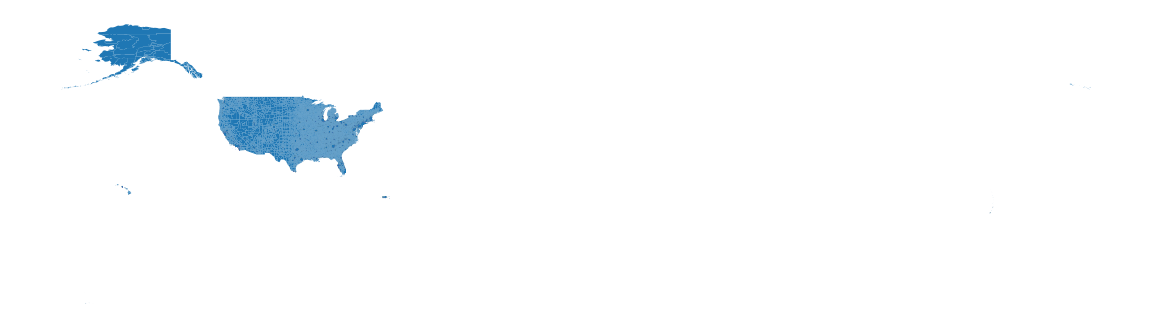

In [16]:
fig, ax = plt.subplots(figsize=(16,4))
tracts.plot(ax = ax)
ax.axis('off');

In [17]:
m = folium.Map(location=[40, -95], zoom_start=4, prefer_canvas=True)
m

In [18]:
med_loan_value = approved.groupby('census_string')['loan_amount'].median()
med_loan_value = med_loan_value.reset_index()
med_loan_value.sort_values(by='loan_amount',ascending=False)

,census_string,loan_amount
2650,08113968102,5305000.0
12854,48453034900,4185000.0
11475,48201411200,3885000.0
2564,08037000401,3505000.0
10025,48015760400,3285000.0
...,...,...
715,06019004100,5000.0
649,06019000702,5000.0
4746,21013960400,5000.0
2371,06107001305,5000.0


In [19]:
m = folium.Map(location=[40, -95], zoom_start=4, prefer_canvas=True)

folium.Choropleth(
    geo_data=tracts,
    name="choropleth",
    data=med_loan_value,
    columns=["census_string", "loan_amount"],
    key_on="feature.properties.GEOID",
    fill_color="PuBu",
    fill_opacity=0.7,
    nan_fill_opacity = 0,
    line_opacity=.01,
    legend_name="Loan Amount",
    bins=[0,250_000,500_000,1_000_000,2_000_000,10_000_000]
).add_to(m)

folium.LayerControl().add_to(m)

# m

In [20]:
med_loan_tracts = tracts.merge(med_loan_value, how='left', left_on='GEOID', right_on='census_string')
med_loan_tracts

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry,census_string,loan_amount
0,01,097,006505,1400000US01097006505,01097006505,65.05,Census Tract 65.05,AL,Mobile County,Alabama,CT,94686529,501122,"POLYGON ((-88.40601 30.58976, -88.38573 30.615...",01097006505,65000.0
1,05,131,001202,1400000US05131001202,05131001202,12.02,Census Tract 12.02,AR,Sebastian County,Arkansas,CT,4381207,34047,"POLYGON ((-94.43277 35.33941, -94.39136 35.338...",NaN,NaN
2,06,059,099511,1400000US06059099511,06059099511,995.11,Census Tract 995.11,CA,Orange County,California,CT,944442,1356526,"POLYGON ((-118.11464 33.74461, -118.11305 33.7...",NaN,NaN
3,06,037,620904,1400000US06037620904,06037620904,6209.04,Census Tract 6209.04,CA,Los Angeles County,California,CT,576178,413509,"POLYGON ((-118.41269 33.88388, -118.40768 33.8...",NaN,NaN
4,06,001,428500,1400000US06001428500,06001428500,4285,Census Tract 4285,CA,Alameda County,California,CT,624197,383522,"POLYGON ((-122.26360 37.76743, -122.25575 37.7...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85188,37,159,051502,1400000US37159051502,37159051502,515.02,Census Tract 515.02,NC,Rowan County,North Carolina,CT,13653797,602104,"POLYGON ((-80.69609 35.50581, -80.65807 35.546...",NaN,NaN
85189,06,065,042802,1400000US06065042802,06065042802,428.02,Census Tract 428.02,CA,Riverside County,California,CT,3156976,0,"POLYGON ((-117.24372 33.78334, -117.23477 33.7...",06065042802,165000.0
85190,48,423,001102,1400000US48423001102,48423001102,11.02,Census Tract 11.02,TX,Smith County,Texas,CT,2774447,679,"POLYGON ((-95.30362 32.31181, -95.27895 32.312...",48423001102,245000.0
85191,36,015,000500,1400000US36015000500,36015000500,5,Census Tract 5,NY,Chemung County,New York,CT,1493597,50755,"POLYGON ((-76.83284 42.08993, -76.82248 42.096...",NaN,NaN


In [ ]:
applications.info()

In [ ]:
# prune = applications[applications['action_taken'].isin([1,2,3,4,5])].copy()
# prune

In [ ]:
# prune = prune[prune['business_or_commercial_purpose'] == 2]
# prune

In [ ]:
prune = prune[prune['occupancy_type'] != 3]
prune

In [ ]:
# prune = prune.iloc[:,[1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,26,27,28,29,30,31,33,34,35,36,37,38,43,45,46,47,48,59,71,77,83,88,89,90,91,92,93,94,95,96,97,98]]
# prune

In [ ]:
# prune.to_csv('../data/pruned_data.csv')